In [ ]:
#Social_Network_Ads.csv

**Importing the libraries**

In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve
from sklearn.model_selection import cross_val_score

**Importing the dataset**

In [16]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [6]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
User ID,400.0,1.569154e+07,71658.321581,15566689.0,15626763.75,15694341.5,15750363.0,15815236.0
Age,400.0,3.765500e+01,10.482877,18.0,29.75,37.0,46.0,60.0
EstimatedSalary,400.0,6.974250e+04,34096.960282,15000.0,43000.00,70000.0,88000.0,150000.0
Purchased,400.0,3.575000e-01,0.479864,0.0,0.00,0.0,1.0,1.0


Text(0, 0.5, 'EstimatedSalary')

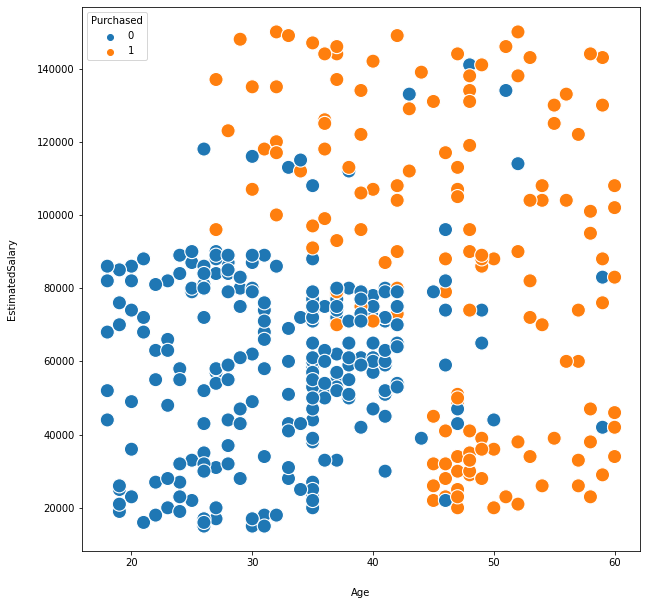

In [10]:
plt.figure(figsize=(10, 10))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data, s=200)
plt.xlabel("Age", labelpad=20)
plt.ylabel("EstimatedSalary", labelpad=20)

In [17]:
data["Gender"]= data["Gender"].map({'Male':1,'Female': 2})

In [25]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,2,26,43000,0
3,15603246,2,27,57000,0
4,15804002,1,19,76000,0


In [26]:
data = data.drop(['User ID'], axis=1)
data.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,2,26,43000,0
3,2,27,57000,0
4,1,19,76000,0


**Splitting the dataset into the Training set and Test set**

In [27]:
a = []
for i in data.keys():
  a.append(i)
print(a)

['Gender', 'Age', 'EstimatedSalary', 'Purchased']


In [28]:
a.remove('Purchased')
a

['Gender', 'Age', 'EstimatedSalary']

In [30]:
X= data[a].values
y = data['Purchased'].values
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state= 10)

**Feature Scaling**

In [31]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train= scaler.transform(X_train)
X_test= scaler.transform(X_test)

**Fitting Decision Tree Classification to the Training set**

In [33]:
for depth in [1,2,3,4,5,6,7,8,9,10,20,40,60]:
  dt= DecisionTreeClassifier(max_depth= depth, random_state= 10)
  dt.fit(X_train, y_train)
  train_accuracy= accuracy_score(y_train,dt.predict(X_train))
  print("depth   :", depth,"train Accuracy : ",train_accuracy, "test accuracy  :", accuracy_score(y_test, dt.predict(X_test)))

depth   : 1 train Accuracy :  0.8321428571428572 test accuracy  : 0.8583333333333333
depth   : 2 train Accuracy :  0.9178571428571428 test accuracy  : 0.9083333333333333
depth   : 3 train Accuracy :  0.9178571428571428 test accuracy  : 0.9083333333333333
depth   : 4 train Accuracy :  0.9285714285714286 test accuracy  : 0.9083333333333333
depth   : 5 train Accuracy :  0.9428571428571428 test accuracy  : 0.925
depth   : 6 train Accuracy :  0.9535714285714286 test accuracy  : 0.9333333333333333
depth   : 7 train Accuracy :  0.9607142857142857 test accuracy  : 0.9166666666666666
depth   : 8 train Accuracy :  0.9714285714285714 test accuracy  : 0.9083333333333333
depth   : 9 train Accuracy :  0.9821428571428571 test accuracy  : 0.9
depth   : 10 train Accuracy :  0.9928571428571429 test accuracy  : 0.9
depth   : 20 train Accuracy :  1.0 test accuracy  : 0.9
depth   : 40 train Accuracy :  1.0 test accuracy  : 0.9
depth   : 60 train Accuracy :  1.0 test accuracy  : 0.9


test accuracy: 0.933333


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


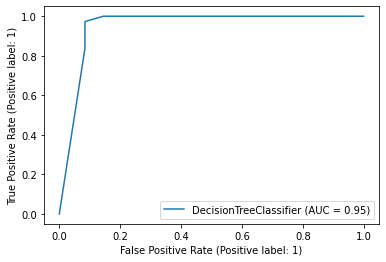

In [34]:
dt= DecisionTreeClassifier(max_depth= 6)
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
acc= accuracy_score(y_test, y_pred)
print( "test accuracy: {:2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)

**Predicting the Test set results**

In [35]:
y_pred= dt.predict(X_test)
y_pred

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0])

**Making the Confusion Matrix**

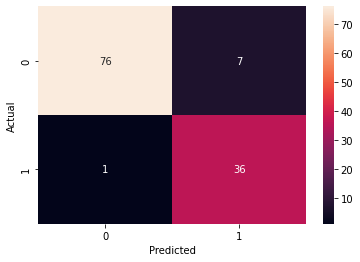

In [36]:
cm= pd.crosstab(y_test, y_pred, rownames= ["Actual"], colnames= ["Predicted"])
sns.heatmap(cm, annot= True)
plt.show()

**Visualising the Training set results**

In [37]:
train_accuracy = accuracy_score(y_train,dt.predict(X_train))
print(train_accuracy)

0.9535714285714286


**Visualising the Test set results**

In [38]:
y_pred = dt.predict(X_test)
test_acc= accuracy_score(y_test, y_pred)
print( "test accuracy: {:2f}".format(test_acc))

test accuracy: 0.933333
